<hr>

# <font color='Purple'>GENETIC ANALYSIS: *R* ANALYSIS OF SEQUENCING DATA</font>

<hr>
    
Dr Graham S Sellers *g.sellers@hull.ac.uk*

![image](./images/R.png)

# <font color='Purple'>1. Data</font>

<hr>

*R* is widely used for data analysis. So it is no surprise that we must know how to deal with data when using it.  
  

**Important**: We will use a test dataset initially. It is DNA metabarcoding sequencing data in the same data output format as you will have for your sequencing data. Columns are samples, rows are "species". Each entry in the dataframe is the number of sequenced reads per "species".  

Data discussed, lets get on with it!  
## <font color='Purple'>1.1. Reading data into R</font>

Data can be read into *R* in different ways. Here we will use the normal method for the kind of input data we have.  
Our data is a tab-delimited (.tsv) output from the taxonomic assignment of the sequencing data generated from the lab practical.  
You may remember the layout of the data in this format as we created an example of it in the last bioinformatics session.  

First, lets make a dataframe object called "*test_data*" from the `test_data.tsv` located in the `data/` directory:


In [ ]:
test_data = read.csv('data/test_data.tsv', sep = '\t', header = T, row.names = 1)

A short description of what we just did there:  

`test_data =` creates a data object (a dataframe in our case) called "*test_data*" which we can recall  
We used the `read.csv()` function to read in a data file  
`'/data/test_data.tsv'` is the path to the file we wish to read in  
`sep = '\t'` makes `read.csv()` read "*test_data.tsv*" as a tab-delimited file (.tsv) (i.e < TAB > between columns)  
`header = T` means use the first row of the data as the column headers for the dataframe (logical: T (TRUE) or F (FALSE))  
`row.names = 1` uses the first column (column 1) as the rownames of the dataframe  

OK, we loaded in some data, now what?

## <font color='Purple'>1.2. Exploring the data</font>
We have a data object, we'll explore it a bit with *R*'s basic functions.  

First, let's recall the data object, our dataframe:

In [ ]:
test_data

That's a bit too much to look at!  

So, let's just look at the top rows of the data using the `head()` function:

In [ ]:
head(test_data)

...and now the last rows with the `tail()` function:

In [ ]:
tail(test_data)

Now look at the column names of the dataframe using the `colnames()` function:


In [ ]:
colnames(test_data)

You can also use the `names()` function:


In [ ]:
names(test_data)

Now the row names with `rownames()`:


In [ ]:
rownames(test_data)

Right then, we know that columns are samples and rows are species.  

To be exact it really isn't species, it is OTUs (Operational Taxonomic Units) as some assignments are higher than species (i.e genus etc.). OTU is the better way to describe taxonomic assignment, unless you focus purposefully on the species level.  

The last column of the dataframe gives the taxonomic lineage of each OTU.  

OK, pedantry aside, let's continue...  

How large is our dataframe? let's use the dim() function to get it's dimensions:

In [ ]:
dim(test_data)

Our test data is 54 rows by 6 columns (first value is rows, second is columns for the `dim()` output).  
Taxonomic lineages (*taxonomy*) forms the final (6th) column.  

Instead of using dim you can return just the number of columns with `ncol()` or rows with `nrow()`:

In [ ]:
ncol(test_data)
nrow(test_data)

## <font color='Purple'>1.3. Viewing columns of the data</font>
A column can be isolated from the dataframe and viewed by specifying the column name.  
We can find column names using `colnames()` or `names()` (see above).  

Look at an individual column of the dataframe like this:

In [ ]:
test_data$OP01

This shows a list of the values in that specific column.

# <font color='Purple'>2. Data manipulation</font>

<hr>

You now know how to read in some data as a dataframe and look at it's structure. That is an important basic skill for any form of *R* analysis.  

The dataframe is loaded into *R*, it has been explored, but now what to do with it?  

We need to manipulate it. By this I mean to look at subsets of interest to us, i.e. pull out the bits we want.  
In this section we will look at different methods to do just this. The ways that we can organise our dataframe to better suit our needs.
## <font color='Purple'>2.1. Dataframe indexing</font>

Indexing is a very powerful method that can be used in multiple ways in *R*.  
Indexing uses the values within a set of square brackets (`[` `]`) to isolate rows or columns from a dataframe.  
It can be very abstract to get your head around to begin with, but it is a method worth understanding.  
It will be important in the final stages of the *R* analysis of the sequencing data generated in the laboratory sessions.   


We have "*test_data*", lets look at the first column of it:


In [ ]:
test_data[,1]

...now the first row:

In [ ]:
test_data[1,]

The position of the comma changes which we look at, columns or rows.  

Columns 1 to 4:

In [ ]:
test_data[,1:4]

Rows 1 to 4:

In [ ]:
test_data[1:4,]

Columns 1 to 4 and rows 3 to 6:

In [ ]:
test_data[1:4, 3:6]

To put this into context: rows are before the comma, columns after.  
Use the `dim()`, `ncol()` or `nrow()` functions to check how many columns and rows you have if needed (see above).  
## <font color='Purple'>2.2. Subset by indexing</font>
Suppose we need to have the "*test_data*" dataframe without the taxonomy column?  
Using dataframe indexing, in combination with the `ncol()` function (see above), we will look at the whole dataframe excluding the taxonomy column.  
As "*taxonomy*" is the last column of our dataframe, `ncol(test_data)-1` will give the positional value of the second to last column.  

We can now grab column 1 to the second to last column:

In [ ]:
test_data[,1:ncol(test_data)-1]

Oh look! No taxonomy column! Excellent!  

Using this we can get numeric values from our dataframe.  
The taxonomy column is strings - letters or words, not numeric values.  

Suppose we need to get the sum all rows or columns of the dataframe? Having a string in a row will not work - it requires purely numeric values!  
Removing the taxonomy column will achieve this perfectly!  

Our "*test_data*" frame has samples as columns. So let's calculate the total sequencing reads of each sample by summing all values in each column using the `colSums()` function:

In [ ]:
colSums(test_data[,1:ncol(test_data)-1])

This is just what we were after. Nice.  

If we would have done the following it would give an Error message as there is still the taxonomy column:

In [ ]:
colSums(test_data)

What happens if the thing we want to exclude is somewhere else in the dataframe?  
The only way we can access this is via explicitic column name exclusiion.  

Columns or many things can be called by a matching string (i.e. letter or words).  

Lets try this:

In [ ]:
test_data[,!colnames(test_data) %in% "taxonomy"]

Look at the code above. Consider the indexing and what is happening.  


By using `!` we have just said "*don't include*" column names matching, `%in%`, "*taxonomy*".  
Combine this with the indexing we learnt above and it is again a powerful tool for data manipulation.  
This is a very useful thing to know. Maybe a dataframe can be complicated or even need to exclude certain columns explicitly by name. A point to consider.  

Lets remember this as "indexing by `%in%`" - we'll use this later.

## <font color='Purple'>2.3. Playing with numbers</font>
If a dataframe is entirely numeric (like "*test_data*" without the "*taxonomy*" column) then there are a multitude of mathmatics we can do to it.  

Lets use indexing to crop the dataframe to pure numeric values (we know this because it is not including "*taxonomy*").  

We will do this and assign a data object to it:

In [ ]:
ralf = test_data[1:5, 1:3]

Recall the object "*ralf*":

In [ ]:
ralf

Sum of all columns in "*ralf*" using the `colSums()` function:

In [ ]:
colSums(ralf)

Sum of all rows in "*ralf*" using the `rowSums()` function:

In [ ]:
rowSums(ralf)

It is important to note that a lot can be done with numeric data. This will become apparent in the next section.  

Using the cells below, have a play around with the test data to familiarise yourself some more with indexing.

# <font color='Purple'>3. Sequencing data analysis</font>

<hr>

In the first seection learnt how to read in some data as a dataframe and look at it's structure. The second section demonstrated how to manipulate your data to get it to do what you want.  

Now we will put all this together in the *R* analysis or the human skin microbiome metabracoding sequencing data you generated in the lab sessions.  

This gets a bit complex, but don't panic - work through the stages and ask for assistance if needed.  

## <font color='Purple'>IMPORTANT: Clear *R*'s memory</font>

Before we go any further we should clean up *R*'s memory.  
This will make sure there is none of the test data remaining to confuse the actual analysis. We can then begin the next section with a clean slate!  

To do this run the cell below:

In [238]:
rm(list = ls())

Remember this as you will be using it later.

 
## <font color='Purple'>3.1. Grab the data</font>

Just as before we will get the data read into *R*. The file you need is located in the `data/` directory and is called "genetic_analysis_students_raw.tsv".  

Lets get this data read in using the `read.csv()` function:

In [231]:
my_data = read.csv('data/genetic_analysis_raw_data.tsv', sep = '\t', header = T, row.names = 1)

## <font color='Purple'>3.1.1 Explore the data</font>

Using the empty cells below, explore the data to get a better feel for it.  
Remember the functions such as `head()`, `tail()`, `ncol()` etc.  


## <font color='Purple'>3.2. Cleaning the data</font>

Metabarcoding data is invariably noisy. It will have some OTUs taxonomically assigned that are low read counts and a lot of sequencing data can be left completely unassigned to any taxonomic rank at all.  

Before carrying out any analysis of the data we must first clean the dataframe and make it suitable for purpose. Here we shall do just that.  

The data needs to be numeric, so let's remove the taxonomy column:

In [232]:
my_data = my_data[,!colnames(my_data) %in% "taxonomy"]

For our analysis the dataframe is oriented the wrong way. Rows should be samples and columns OTUs.  

We need to transpose the data using the `t()` function.  
But to make sure the dataframe remains as a dataframe, we have to make it a datframe again (yes, *R* can seem a bit strange at times). The `as.data.frame()` function will make it a datafame.  

With this in mind, lets transpose our data:

In [233]:
my_data = as.data.frame(t(my_data))

Check to see if the data is correctly oriented in the cell below:

**Now we must deal with the low frequency reads in each sample, the OTUs that have low read counts.**  

In our data, OTUs in a sample with less than 5 reads assigned to them can be considered noise.  
These OTUs could be genuinely presnent, but can just as easily be false artefacts from sequencing/taxonomic assignment error. Either way, they are not desirable and need to be removed.  

To do this we will apply a threshold to the entire dataframe. The threshold being that any value below 5 is removed and counted as 0.  

Using *R* logic (TRUE or FALSE) can determine if a result is < 5. Try it:

In [ ]:
my_data < 5

***Question:*** Is this what you were expecting to see? Why?  

This in combination with indexing can change the values listed as TRUE to equal 0:

In [234]:
my_data[my_data < 5] = 0

It is inevitable that we now have OTUs with no reads assigned to them anyehere in the dataframe. We need to remove them now as it will confuse downsteam analysis.  

Let's chop these from the data using the `colSums()` function, with a pinch of indexing and logic:

In [235]:
my_data = my_data[!colSums(my_data) == 0]

As you have probably seen from exploring the data earlier, there is an OTU called "unassigned". These are the reads that failed to be assigned to any taxonomic rank in the sample and are left "unassigned". These reads form no part in our analysis and need to be removed.  

To do this we will use the same indexing methods as when we deleted the "taxonomy" before. However we are removing a row here not a column - remember the comma position while indexing for rows.  

Right, time to drop the "unassigned" row:

In [236]:
my_data = my_data[,!colnames(my_data) %in% "unassigned"]

The code above should make sense to you by now. If not, please ask a demonstartor or discuss with the person next to you.  

## <font color='Purple'>3.3. Write out the cleaned data</font>

The data is now clean!  
We should really write it out to a file so we can come back to it easily in future without having to run all the code again.  

To do this we will use the `write.table()` function.  
By now the code required to do this should make some kind of sense to you when looking at it.  

So let's write it out:

In [237]:
write.table(my_data, file = 'data/genetic_analysis_cleaned_data.tsv', sep = '\t', col.names = NA)

## <font color='Purple'>Clear *R*'s memory</font>
Here is a good point to clear the memory again.  
None of the variables or objects we have justs generated above are needed anymore.  

Use the cell below to clear *R*'s memory:

## <font color='Purple'>-- PAUSE --</font>

Before moving on take a moment to think about what you have just done.  
Reflect on the data managemnent aspects you have just followed in the sections above.  

**Questions:**  
Why did we have to clean the data?  
Can you describe what the important steps in the data cleaning were?  
Can you go over the last section and understand the code involved?  

Discuss with the person next to you or ask a demonstrator.

In [239]:

# ==============================================================================

# FORMATTING THE DATA

# ==============================================================================

# read in the new clean dataset:
my_data_cleaned = read.csv('data/genetic_analysis_cleaned_data.tsv', sep = '\t', header = T, row.names = 1)

# make a proportion reads dataframe:
my_data_prop = my_data_cleaned
my_data_prop = my_data_prop/rowSums(my_data_prop)

# make a presence/absence dataframe:
my_data_pa = my_data_cleaned
my_data_pa[my_data_pa > 0] = 1



We will make a list of seperate data frames per limb.  

to do this we need to isolate each limb  

`grep()`

Let's hack the data into body parts!  
Hack away:

In [240]:

l_leg = my_data_pa[grep("LL", rownames(my_data_pa)),]
r_leg = my_data_pa[grep("LR", rownames(my_data_pa)),]
l_arm = my_data_pa[grep("AL", rownames(my_data_pa)),]
r_arm = my_data_pa[grep("AR", rownames(my_data_pa)),]

body_parts = list(l_leg, r_leg, l_arm, r_arm)

names(body_parts) = c("left_leg", "right_leg", "left_arm", "right_arm")


In [ ]:
body_parts

# species richness

In [241]:
my_data_rich = my_data_pa[FALSE]

my_data_rich$richness = rowSums(my_data_pa)
my_data_rich$limb = rep(c(1, 2, 3, 4), each = 3)

my_data_rich

,richness,limb
,<dbl>,<dbl>
LL1,72,1
LL2,127,1
LL3,116,1
LR1,103,2
LR2,92,2
LR3,82,2
AL1,111,3
AL2,93,3
AL3,111,3


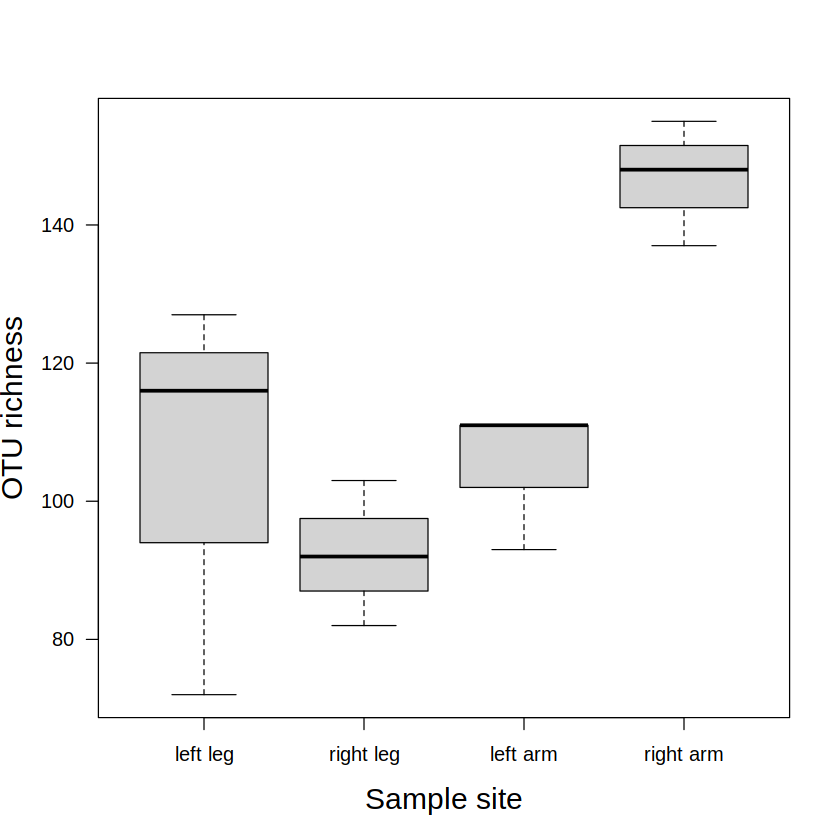

In [242]:
boxplot(my_data_rich$richness ~ my_data_rich$limb,
        names = c("left leg", "right leg", "left arm", "right arm"),
        ylab = 'OTU richness',
        xlab = 'Sample site',
        cex.lab = 1.5,
        las = 1)

In [243]:
l_leg_rich = sum(colSums(body_parts$left_leg) > 0)
r_leg_rich = sum(colSums(body_parts$right_leg) > 0)
l_arm_rich = sum(colSums(body_parts$left_arm) > 0)
r_arm_rich = sum(colSums(body_parts$right_arm) > 0)

total_richness = c(l_leg_rich, r_leg_rich, l_arm_rich, r_arm_rich)
names(total_richness) = c("left leg", "right leg", "left arm", "right arm")

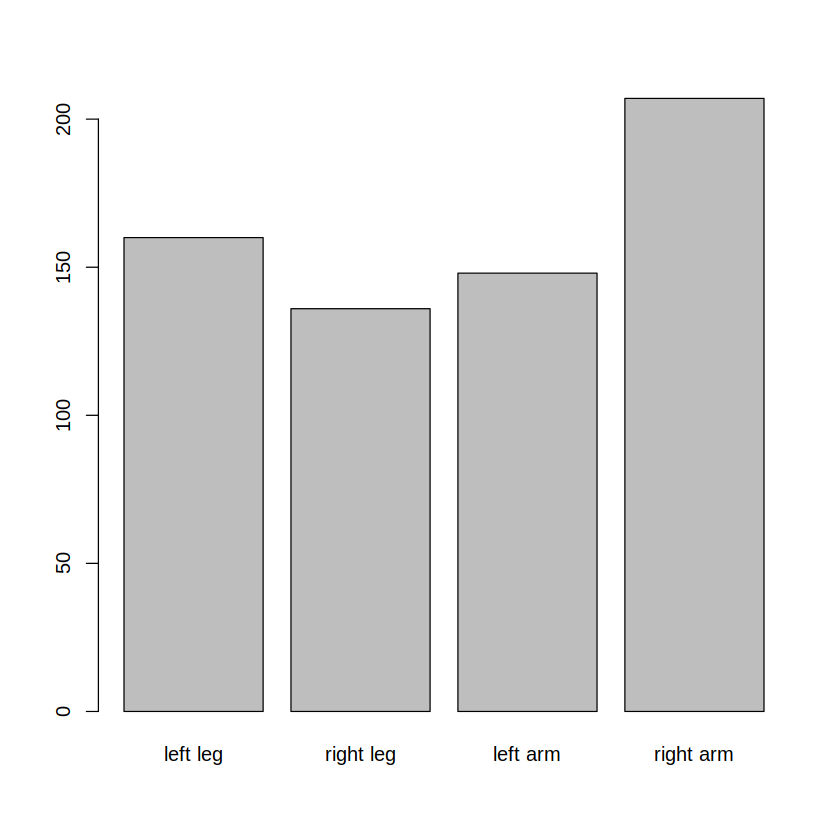

In [244]:
barplot(total_richness, beside = T)

# VEGAN

# species accumulation

In [245]:
library(vegan)

for the list of limb dataframes we will have to loop through each to make another list of outputs from vegan's species accumulation function: `specaccum()`

In [246]:
species_accum = list()

limbs = c("left_leg", "right_leg", "left_arm", "right_arm")

for(limb in limbs){
        vegan_accum = specaccum(body_parts[[limb]],
              method = "exact",
              permutations = 100)
        species_accum[[limb]] = vegan_accum
}

Warning message in cor(x > 0):
“the standard deviation is zero”
Warning message in cor(x > 0):
“the standard deviation is zero”
Warning message in cor(x > 0):
“the standard deviation is zero”
Warning message in cor(x > 0):
“the standard deviation is zero”


In [ ]:
plot(species_accum[[1]])

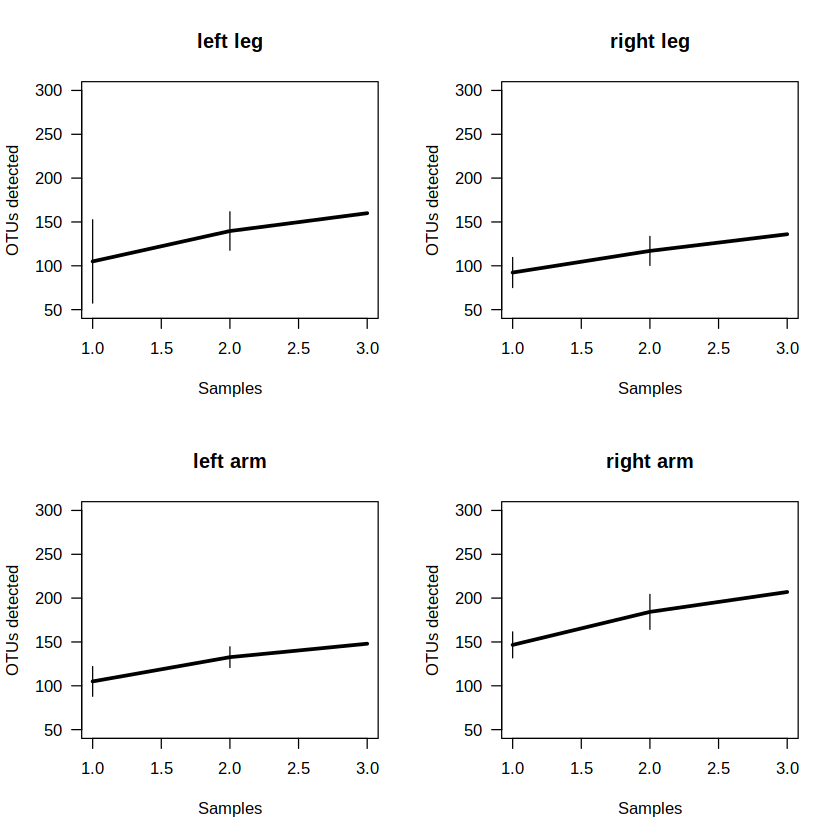

In [251]:
par(mfrow = c(2, 2))

limbs = c("left_leg", "right_leg", "left_arm", "right_arm")

for(limb in limbs){
    plot(species_accum[[limb]],
        ylim = c(50, 300),
        main = sub('_', ' ', limb),
        xlab = 'Samples',
        ylab = 'OTUs detected',
        las = 1)
    lines(species_accum[[limb]]$richness, lwd = 3)
}

In [248]:

library('vegan')

# make presence/absence and proportion reads dataframes suitable for vegan:

# create an env dataframe for use in vegan:
veg_env = my_data_prop[FALSE]
veg_env$site = rownames(veg_env)
veg_env$limb = rep(c('leg', 'arm'), each = 6)
veg_env$side = rep(rep(c('left', 'right'), each = 3), 2)
veg_env$side_limb = paste(veg_env$side, veg_env$limb, sep = '_')
# veg_env$cols = 

ord = metaMDS(my_data_prop, k = 3, try = 100, trymax = 10000, distance = 'bray', na.rm = T)


Run 0 stress 0.02566479 
Run 1 stress 0.02566473 
... New best solution
... Procrustes: rmse 3.892369e-05  max resid 0.0001104985 
... Similar to previous best
Run 2 stress 0.02569564 
... Procrustes: rmse 0.003451072  max resid 0.008874034 
... Similar to previous best
Run 3 stress 0.02566175 
... New best solution
... Procrustes: rmse 0.002199813  max resid 0.006334573 
... Similar to previous best
Run 4 stress 0.0256793 
... Procrustes: rmse 0.004394449  max resid 0.01248065 
Run 5 stress 0.03528554 
Run 6 stress 0.02566489 
... Procrustes: rmse 0.002297192  max resid 0.006625506 
... Similar to previous best
Run 7 stress 0.1825934 
Run 8 stress 0.03768512 
Run 9 stress 0.02566964 
... Procrustes: rmse 0.003344063  max resid 0.009670719 
... Similar to previous best
Run 10 stress 0.0352866 
Run 11 stress 0.03764666 
Run 12 stress 0.02566573 
... Procrustes: rmse 0.002678674  max resid 0.00775556 
... Similar to previous best
Run 13 stress 0.03768353 
Run 14 stress 0.03764676 
Run 15

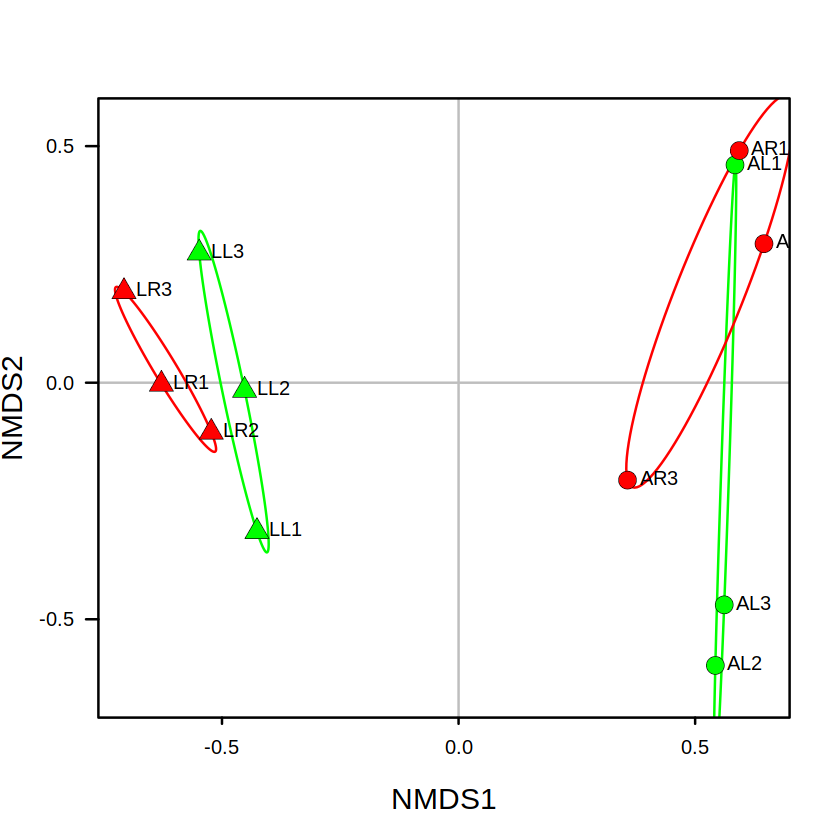

In [249]:

# ------------------------------------------------------------------------------
# PLOT SPECIES ABUNDANCE NMDS
# ------------------------------------------------------------------------------

cols = c('red', 'yellow','green', 'blue')

plot(ord, disp = "sites", type = 'n', axes = F, xlab = 'NMDS1', ylab = 'NMDS2', bty = 'n', cex.lab = 1.5)

axis(1, at = seq(-1,2,0.5), cex.axis = 1, padj = -0.5, tck = -0.01, lwd = 0, lwd.ticks = 2)
axis(2, at = seq(-1,1,0.5), cex.axis = 1, las = 1, tck = -0.02, lwd = 0, lwd.ticks = 2)

abline(h = 0, v = 0, lwd = 2, col = 'grey')

ordiellipse(ord,
            veg_env$side_limb, kind = "ehull", lwd = 2,
            col = rep(c('green', 'red'), each = 2))

text(ord$points[,1:2], labels = veg_env$site, pos = 4)

points(ord,
       disp = "sites",
       pch = ifelse(veg_env$limb == 'arm', 21, 24),
       bg = ifelse(veg_env$side == 'left', 'green', 'red'),
       cex = 2,
       col = 'black',
       lwd=0.5)


box('plot', lwd=2)